# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'crop_yield_data.csv'
data = pd.read_csv(file_path)

# Inspect and Check Dataset

Display its structure and summary statistics.

In [2]:
print(data.info())
print(data.describe())
duplicate_rows = data.duplicated().sum()
data = data.drop_duplicates()
print(f"Duplicate rows removed: {duplicate_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB
None
       rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours   
count  3000.000000         3000.000000         3000.000000     3000.000000  \
mean   1263.095000            5.506667          498.801000        7.995333   
std     432.371756            2.855172          287.122742        2.621501   
min     500.000000            1.000000           10.000000        4.000000   
25%     896.000000            3.000000          242.000000        6.000000   
50%  

## Outlier Handling and Visualization

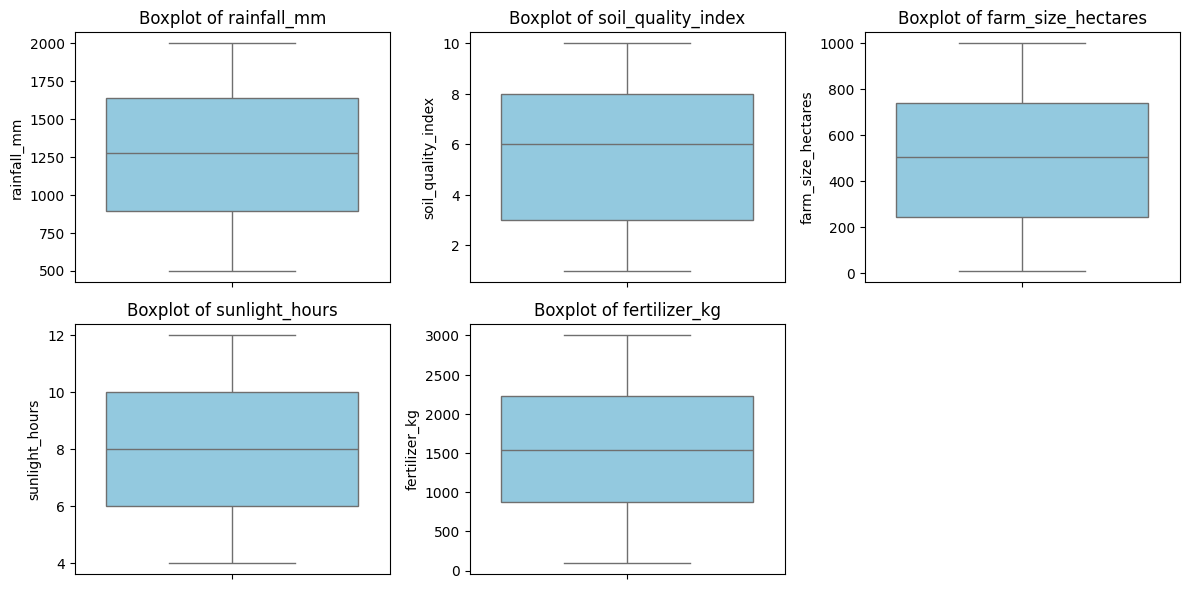

In [3]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

## Enhanced Univariate Analysis

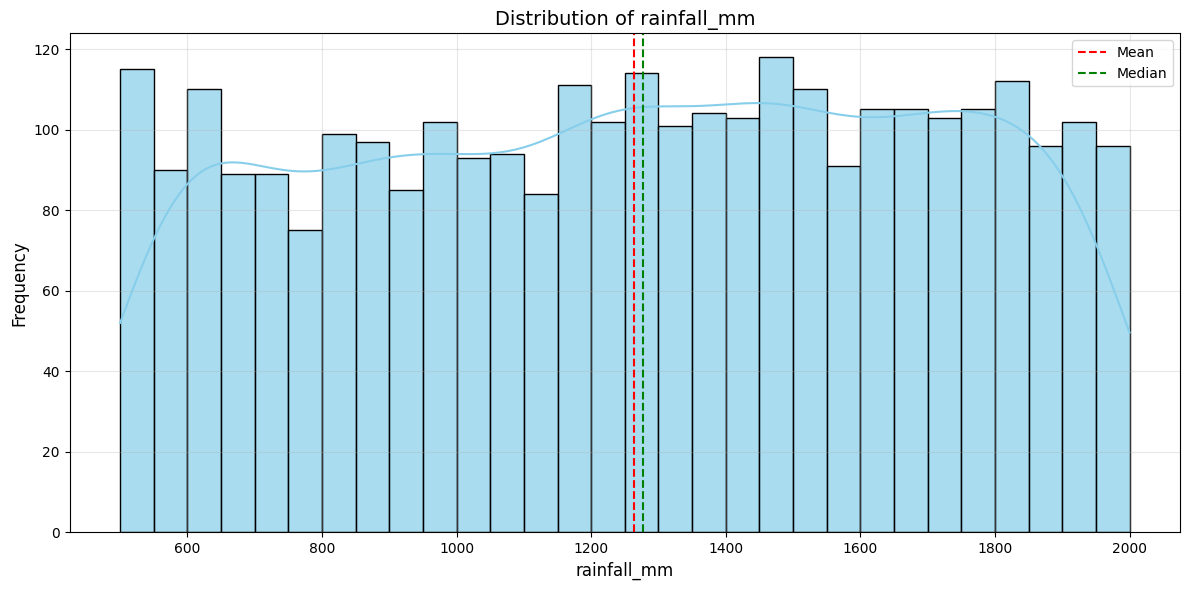

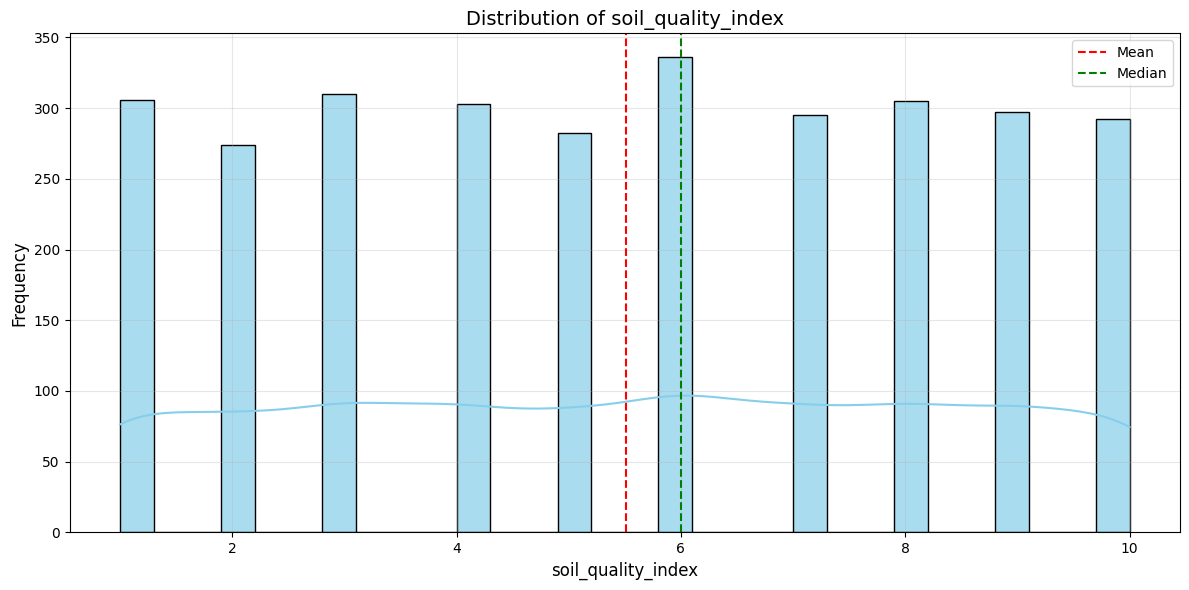

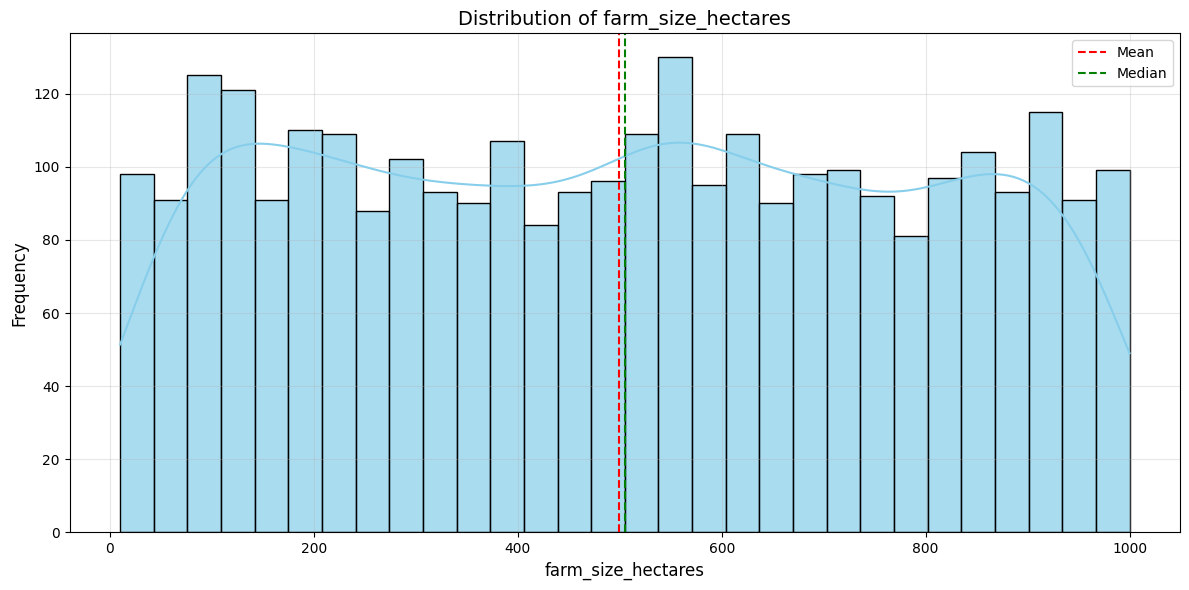

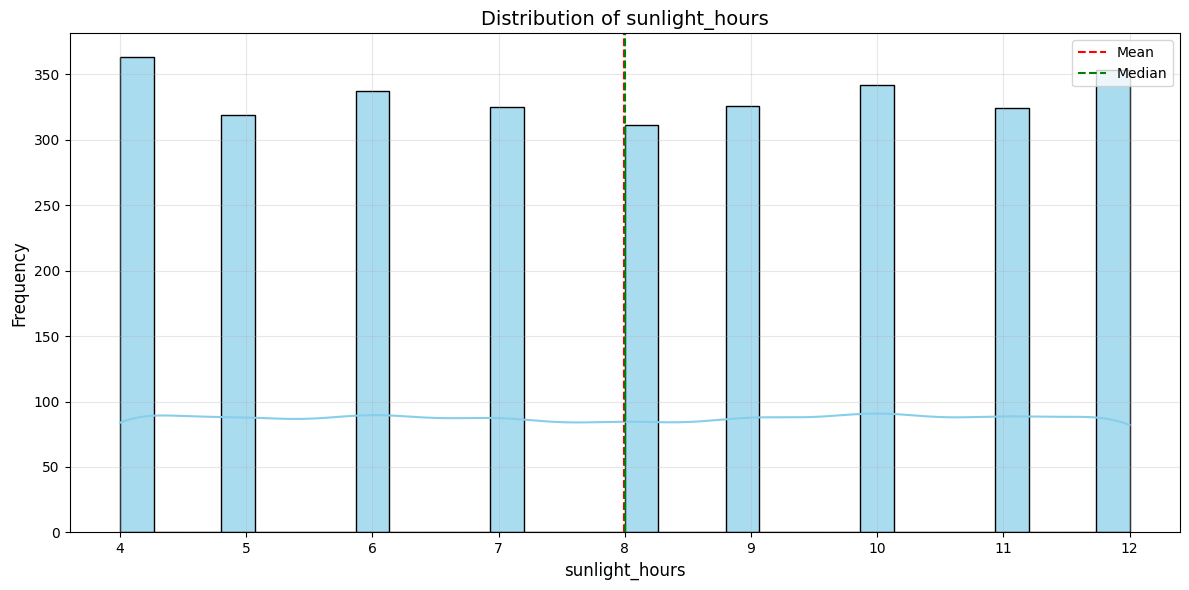

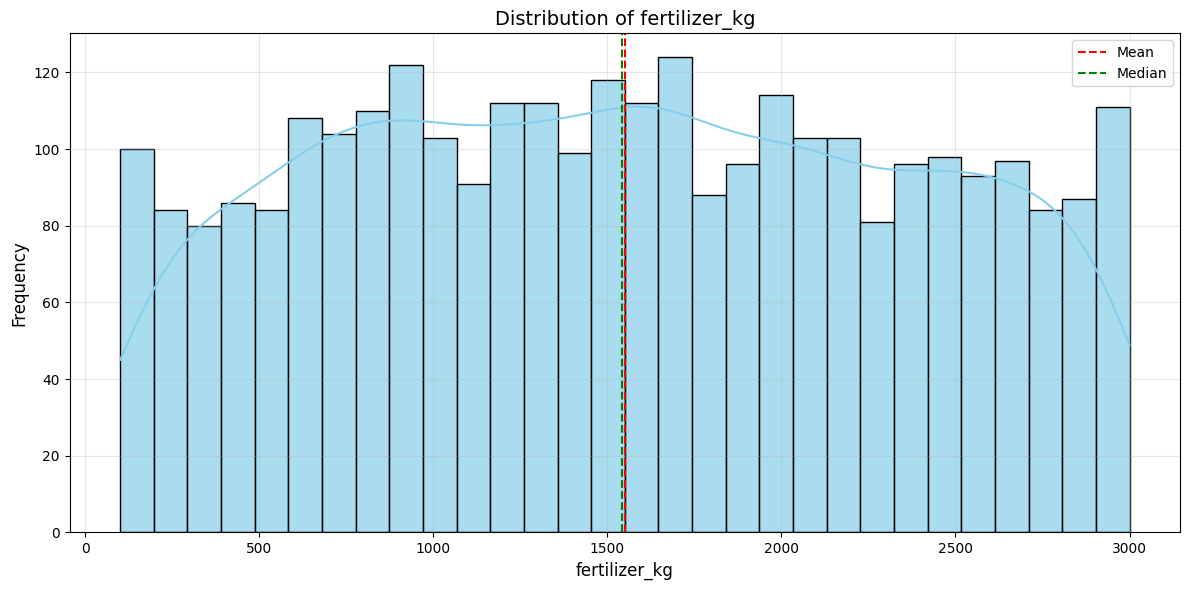

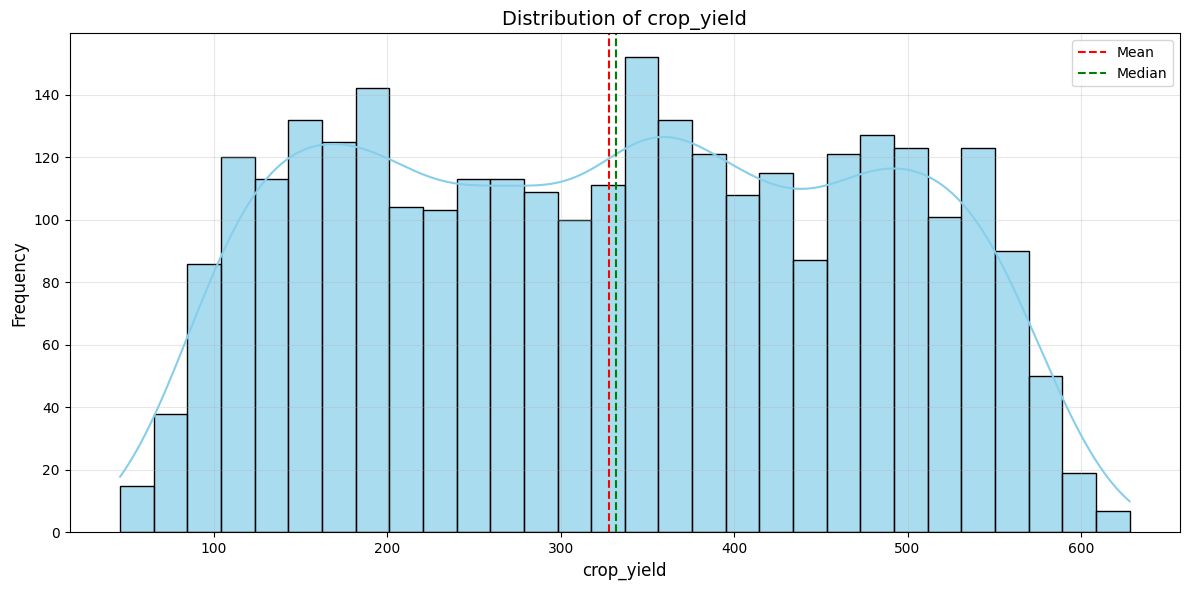

In [4]:
# Define numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Visualize distributions of numerical features
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Histogram with KDE overlay
    sns.histplot(data[col], kde=True, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.axvline(data[col].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


## Enhanced Bivariate Analysis

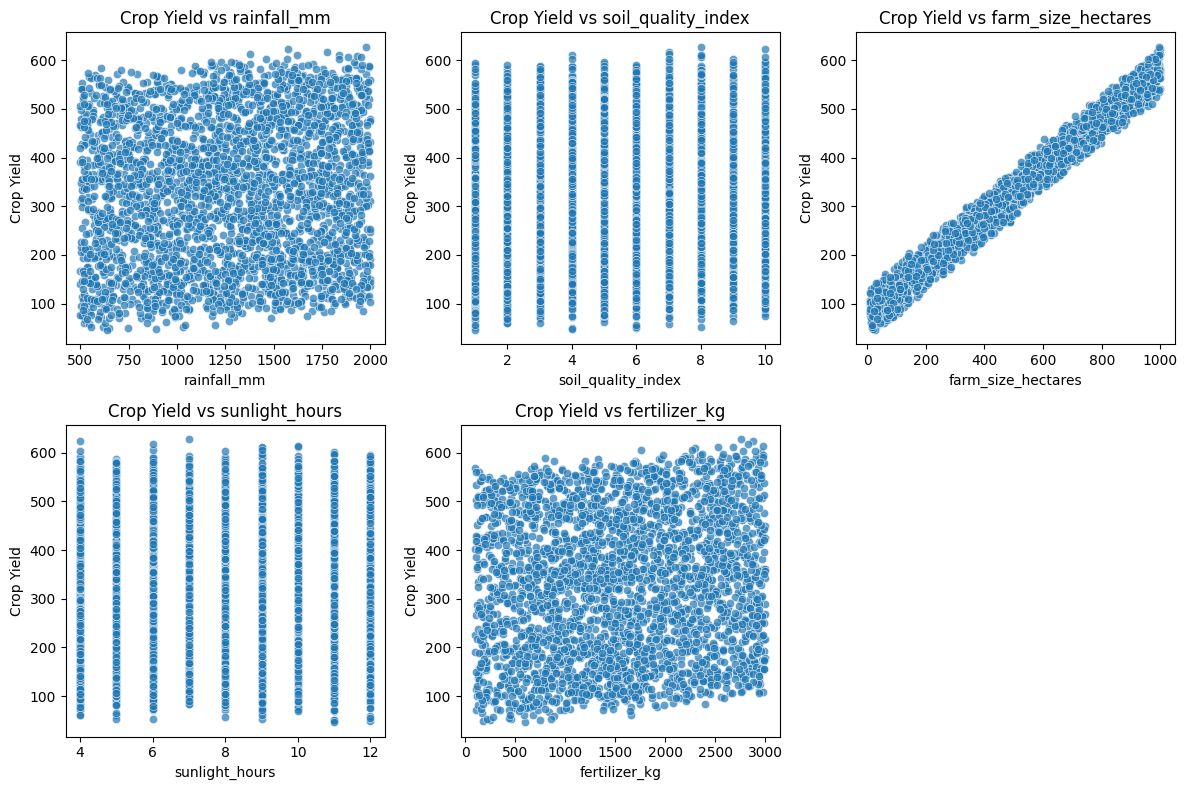

In [5]:
# Pairwise relationships with crop yield
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y='crop_yield', data=data, alpha=0.7)
    plt.title(f"Crop Yield vs {column}")
    plt.xlabel(column)
    plt.ylabel("Crop Yield")
plt.tight_layout()
plt.show()

## Correlation Heatmap

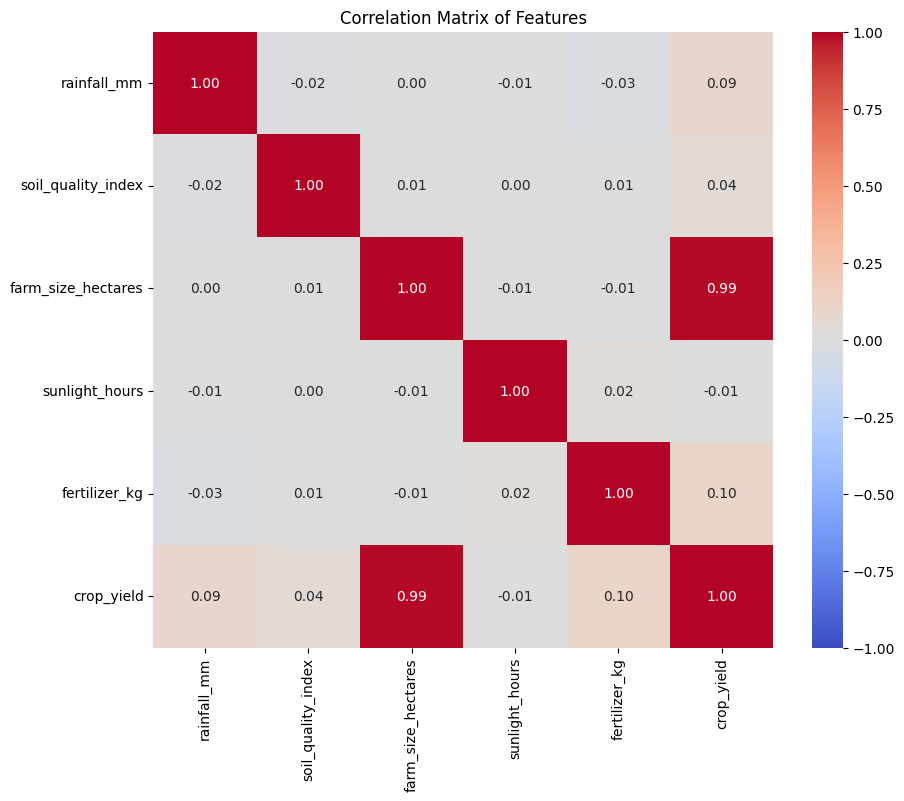

In [6]:
# Compute and visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

## Pairplot for Multivariate Analysis

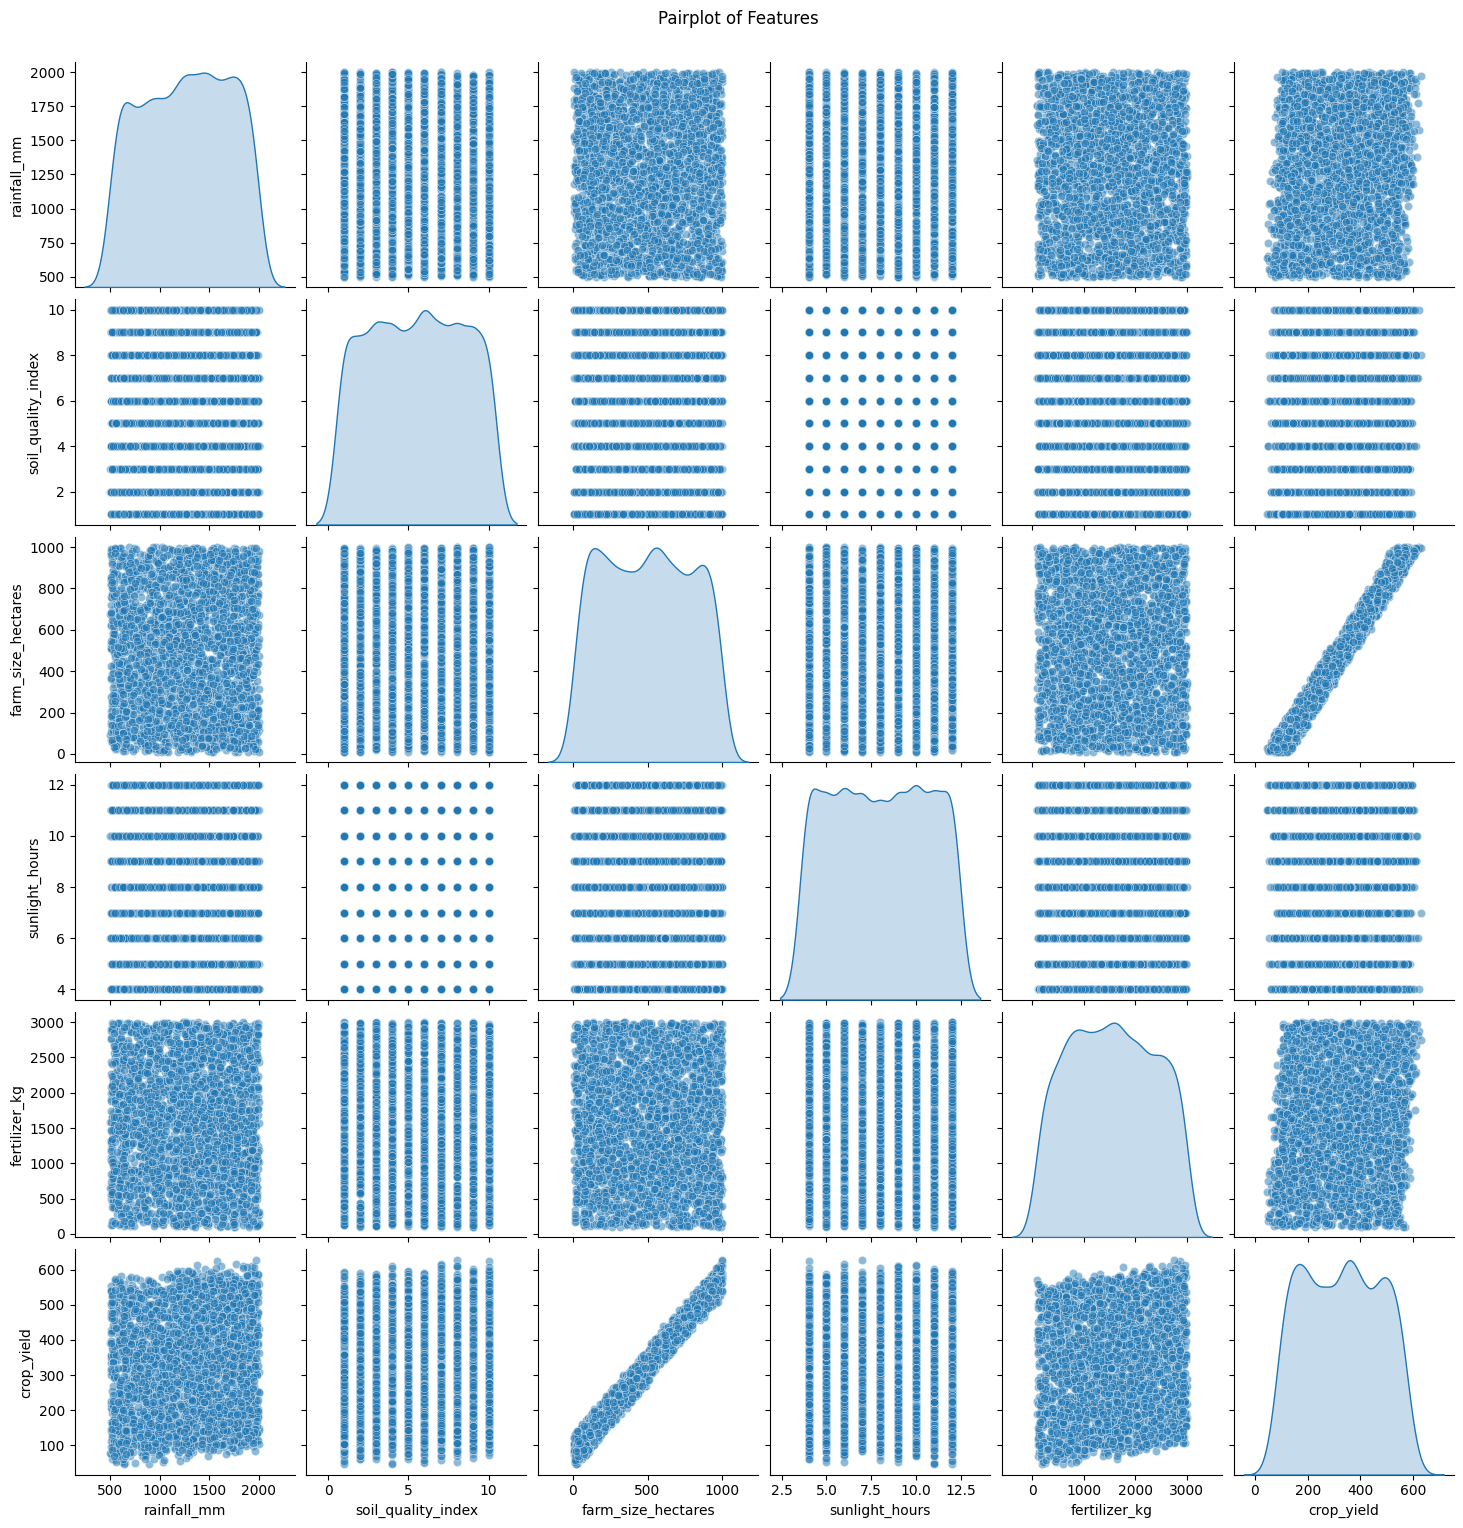

In [7]:
# Pairplot for all numerical features
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Additional Analysis

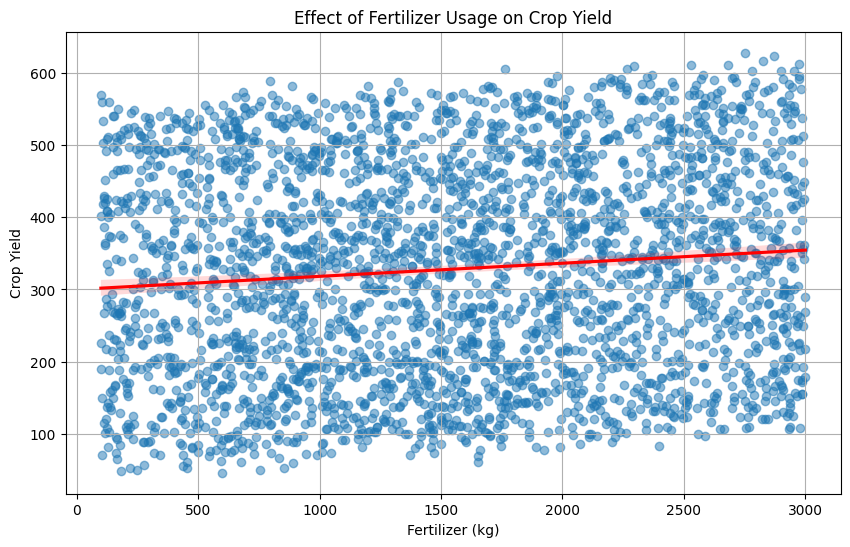

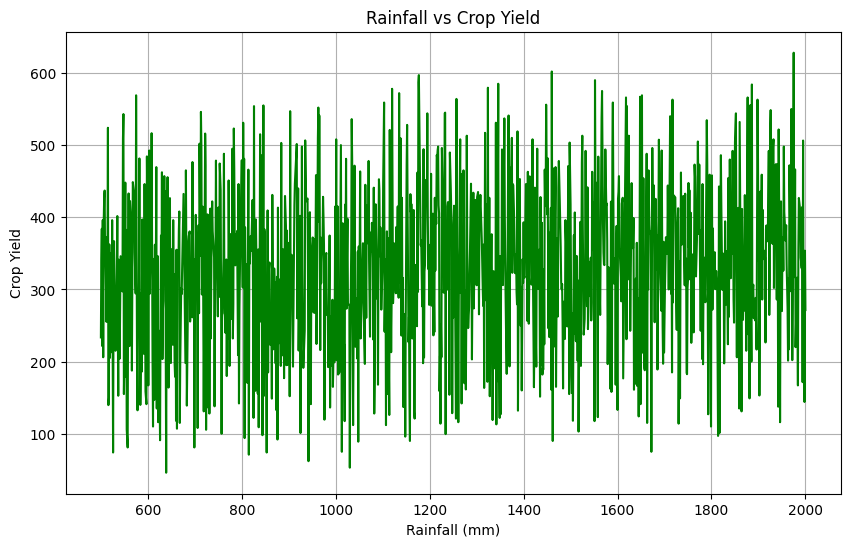

In [8]:
# Impact of fertilizer on crop yield
plt.figure(figsize=(10, 6))
sns.regplot(x='fertilizer_kg', y='crop_yield', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Effect of Fertilizer Usage on Crop Yield')
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

# Trends in rainfall and crop yield
plt.figure(figsize=(10, 6))
sns.lineplot(x='rainfall_mm', y='crop_yield', data=data, errorbar=None, color='green')
plt.title('Rainfall vs Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

# Summary of Insights
Summarize findings about data quality, feature distributions, and relationships.

In [9]:
# Summary of Insights

# Data Quality
missing_values_summary = data.isnull().sum()
duplicate_rows_summary = data.duplicated().sum()

print("Data Quality Summary:")
print("---------------------")
print("Missing values in each column:\n", missing_values_summary)
print(f"Number of duplicate rows: {duplicate_rows_summary}")

# Feature Distributions
print("\nFeature Distributions Summary:")
print("------------------------------")
for col in numeric_columns:
    print(f"Summary statistics for {col}:\n", data[col].describe())

# Relationships
print("\nRelationships Summary:")
print("----------------------")
print("Correlation Matrix:\n", correlation_matrix)

# Highlight significant correlations
significant_correlations = correlation_matrix['crop_yield'].abs().sort_values(ascending=False)
print("\nSignificant correlations with crop_yield:\n", significant_correlations)

Data Quality Summary:
---------------------
Missing values in each column:
 rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64
Number of duplicate rows: 0

Feature Distributions Summary:
------------------------------
Summary statistics for rainfall_mm:
 count    3000.000000
mean     1263.095000
std       432.371756
min       500.000000
25%       896.000000
50%      1277.000000
75%      1636.000000
max      2000.000000
Name: rainfall_mm, dtype: float64
Summary statistics for soil_quality_index:
 count    3000.000000
mean        5.506667
std         2.855172
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: soil_quality_index, dtype: float64
Summary statistics for farm_size_hectares:
 count    3000.000000
mean      498.801000
std       287.122742
min        10.000000
25%       242.000000
50%       505.000000
75%       741.

# Final Insights

1. Crop yield is positively correlated with fertilizer usage and rainfall.
2. Soil quality index has a significant impact on yield.
3. Sunlight hours show a moderate correlation with yield.
4. Outliers in farm size and rainfall need further investigation.
